In [2]:
import io
import requests
import PyPDF2
import re
import spacy
import gensim
import wordcloud
import mlflow
import sklearn
import string
import pandas as pd
import json

In [3]:
def extract_content(url):
    try: 
        response = requests.get(url)
        open_pdf_file = io.BytesIO(response.content)
        pdf = PyPDF2.PdfReader(open_pdf_file)
        
        # Access pdf content 
        text = []
        for i in range(len(pdf.pages)):
            page = pdf.pages[i]
            text.append(page.extract_text())
        
        # Return concatenated content 
        return "\n".join(text)
    except Exception as e:
        print(f"Error occurred while processing {url}: {e}")
        return ""

In [4]:
"""
def clean_esg_report_urls(urls):
    cleaned_urls = []
    for url in set(urls):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                cleaned_urls.append(url)
        except:
            pass
    return cleaned_urls
cleaned_urls = clean_esg_report_urls(urls)
print(cleaned_urls)
"""

'\ndef clean_esg_report_urls(urls):\n    cleaned_urls = []\n    for url in set(urls):\n        try:\n            response = requests.get(url)\n            if response.status_code == 200:\n                cleaned_urls.append(url)\n        except:\n            pass\n    return cleaned_urls\ncleaned_urls = clean_esg_report_urls(urls)\nprint(cleaned_urls)\n'

In [5]:
"""esg_urls= { 'hsbc': 'https://www.hsbc.com/-/files/hsbc/our-approach/measuring-our-impact/pdfs/190408-esg-update-april-2019-eng.pdf',
            'td bank':'https://www.td.com/document/PDF/corporateresponsibility/2018-ESG-Report.pdf',
            'bank of america': 'https://about.bankofamerica.com/assets/pdf/Bank-of-America-2017-ESG-Performance-Data-Summary.pdf',
            'rbc': 'https://www.rbc.com/community-social-impact/_assets-custom/pdf/2019-ESG-Report.PDF',
            'macquarie': 'https://www.macquarie.com/assets/macq/investor/reports/2020/sections/Macquarie-Group-FY20-ESG.pdf',
            'lloyds': 'https://www.lloydsbankinggroup.com/globalassets/documents/investors/2020/2020feb20_lbg_esg_approach.pdf',
            'santander': 'https://www.santander.co.uk/assets/s3fs-public/documents/2019_santander_esg_supplement.pdf',
            'bluebay': 'https://www.bluebay.com/globalassets/documents/bluebay-annual-esg-investment-report-2018.pdf',
            'lasalle': 'https://www.lasalle.com/documents/ESG_Policy_2019.pdf',
            'riverstone': 'https://www.riverstonellc.com/media/1196/riverstone_esg_report.pdf',
            'aberdeen standard': 'https://www.standardlifeinvestments.com/RI_Report.pdf',
            'apollo': 'https://www.apollo.com/~/media/Files/A/Apollo-V2/documents/apollo-2018-esg-summary-annual-report.pdf',
            'bmogan': 'https://www.bmogam.com/gb-en/intermediary/wp-content/uploads/2019/02/cm16148-esg-profile-and-impact-report-2018_v33_digital.pdf',
            'vanguard': 'https://personal.vanguard.com/pdf/ISGESG.pdf',
            'ruffer': 'https://www.ruffer.co.uk/-/media/Ruffer-Website/Files/Downloads/ESG/2018_Ruffer_report_on_ESG.pdf',
            'northern trust': 'https://cdn.northerntrust.com/pws/nt/documents/fact-sheets/mutual-funds/institutional/annual-stewardship-report.pdf',
          }
          """

"esg_urls= { 'hsbc': 'https://www.hsbc.com/-/files/hsbc/our-approach/measuring-our-impact/pdfs/190408-esg-update-april-2019-eng.pdf',\n            'td bank':'https://www.td.com/document/PDF/corporateresponsibility/2018-ESG-Report.pdf',\n            'bank of america': 'https://about.bankofamerica.com/assets/pdf/Bank-of-America-2017-ESG-Performance-Data-Summary.pdf',\n            'rbc': 'https://www.rbc.com/community-social-impact/_assets-custom/pdf/2019-ESG-Report.PDF',\n            'macquarie': 'https://www.macquarie.com/assets/macq/investor/reports/2020/sections/Macquarie-Group-FY20-ESG.pdf',\n            'lloyds': 'https://www.lloydsbankinggroup.com/globalassets/documents/investors/2020/2020feb20_lbg_esg_approach.pdf',\n            'santander': 'https://www.santander.co.uk/assets/s3fs-public/documents/2019_santander_esg_supplement.pdf',\n            'bluebay': 'https://www.bluebay.com/globalassets/documents/bluebay-annual-esg-investment-report-2018.pdf',\n            'lasalle': 'http

In [6]:
esg_urls={ 
  'barclays': 'https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_BARC_2021.pdf',
  'jp morgan chase': 'https://www.jpmorgan.com/content/dam/jpmc/jpmorgan-chase-and-co/documents/jpmc-esg-report-2021.pdf',
  'BNP Paribas': 'https://cdn-group.bnpparibas.com/uploads/file/bnpp_climateanalytics_alignmentreport_final.pdf',
  'goldman sachs': 'https://www.goldmansachs.com/a/2021-sustainability-report.pdf',
  'hsbc': 'https://www.hsbc.com/-/files/hsbc/investors/hsbc-results/2021/annual/pdfs/hsbc-holdings-plc/220222-esg-review-2021.pdf',
  'PNC':'https://www.pnc.com/content/dam/pnc-com/pdf/aboutpnc/CorporateResponsibilityReports/PNC_Corporate_Responsibility_Report_2021.pdf',
  'bank of america': 'https://about.bankofamerica.com/content/dam/about/pdfs/ESG_GHI_2021_508_secured.pdf',
  'rbc': 'https://www.rbc.com/community-social-impact/_assets-custom/pdf/2021-ESG-Report.PDF',
  'macquarie': 'https://www.macquarie.com/assets/macq/investor/reports/2021/sections/macquarie-group-fy21-esg.pdf',
  'lloyds': 'https://assets.lloyds.com/media/8c362b67-e4a5-4876-927f-397c10491d72/Lloyds_ESG%202021_report_final.pdf',
  'santander': 'https://www.santander.com/content/dam/santander-com/en/contenido-paginas/nuestro-compromiso/reports/doc-informe-BR-polonia-2021.pdf',
  'bluebay': 'https://www.rbcbluebay.com/globalassets/documents/bluebay-esg-investment-update-june-2021.pdf',
  'riverstone': 'https://www.riverstonellc.com/media/1328/riverstone-esg-report-2021_updated.pdf',
  'aberdeen standard': 'https://www.abrdn.com/docs?documentId=GB-080322-167278-5',
  'apollo': 'https://www.apollo.com/~/media/Files/A/Apollo-V3/documents/apollo-2021-esg-report-final.pdf',
  'vanguard': 'https://www.nl.vanguard/content/dam/intl/europe/documents/en/climate-change-tcfd-report_en-eu.pdf',
  'ruffer': 'https://www.ruffer.co.uk/-/media/ruffer-website/files/downloads/cat/2021-cat-responsible-investment-report.pdf?la=en&hash=2EB1AE3E432C88D6E51015A3079A5D09',
         }
# Prepare PDF into Dataframe
esg_urls_pd = pd.DataFrame(list(esg_urls.items()), columns=['company', 'url'])

esg_urls = pd.DataFrame(esg_urls_pd)

In [7]:
esg_urls

,company,url
0,barclays,https://www.responsibilityreports.com/HostedDa...
1,jp morgan chase,https://www.jpmorgan.com/content/dam/jpmc/jpmo...
2,BNP Paribas,https://cdn-group.bnpparibas.com/uploads/file/...
3,goldman sachs,https://www.goldmansachs.com/a/2021-sustainabi...
4,hsbc,https://www.hsbc.com/-/files/hsbc/investors/hs...
5,PNC,https://www.pnc.com/content/dam/pnc-com/pdf/ab...
6,bank of america,https://about.bankofamerica.com/content/dam/ab...
7,rbc,https://www.rbc.com/community-social-impact/_a...
8,macquarie,https://www.macquarie.com/assets/macq/investor...
9,lloyds,https://assets.lloyds.com/media/8c362b67-e4a5-...


In [8]:
# add a new column to the data frame esg_urls_pd with the name 'content'

esg_urls_pd['content'] = esg_urls_pd['url'].apply(extract_content)
esg_articles = esg_urls_pd[esg_urls_pd['content'].str.len() > 0] # that only includes rows with non-empty content

Error occurred while processing https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_BARC_2021.pdf: EOF marker not found
Error occurred while processing https://www.pnc.com/content/dam/pnc-com/pdf/aboutpnc/CorporateResponsibilityReports/PNC_Corporate_Responsibility_Report_2021.pdf: EOF marker not found
Error occurred while processing https://about.bankofamerica.com/content/dam/about/pdfs/ESG_GHI_2021_508_secured.pdf: PyCryptodome is required for AES algorithm
Error occurred while processing https://www.rbcbluebay.com/globalassets/documents/bluebay-esg-investment-update-june-2021.pdf: EOF marker not found
Error occurred while processing https://www.apollo.com/~/media/Files/A/Apollo-V3/documents/apollo-2021-esg-report-final.pdf: EOF marker not found


In [9]:
esg_articles

,company,url,content
1,jp morgan chase,https://www.jpmorgan.com/content/dam/jpmc/jpmo...,2021 \nENVIRONMENTAL \nSOCIAL & \nGOVERNAN...
2,BNP Paribas,https://cdn-group.bnpparibas.com/uploads/file/...,1\nBNP PARIBAS / CLIMATE ANALYTICS AND ALIGNM...
3,goldman sachs,https://www.goldmansachs.com/a/2021-sustainabi...,Progress \nThrough \nPerformanceSUSTAINABILITY...
4,hsbc,https://www.hsbc.com/-/files/hsbc/investors/hs...,"Environmental, social \nand governance review\..."
7,rbc,https://www.rbc.com/community-social-impact/_a...,HNW_NRG_B_Bleed_NoMask\nRoyal Bank of Canada\n...
8,macquarie,https://www.macquarie.com/assets/macq/investor...,"52\nEnvironmental, Social and Governance\nMacq..."
9,lloyds,https://assets.lloyds.com/media/8c362b67-e4a5-...,"Environmental, Social \nand Governance \nRepor..."
10,santander,https://www.santander.com/content/dam/santande...,ESG Report 2021\nLooking to the future\nRespon...
12,riverstone,https://www.riverstonellc.com/media/1328/river...,Investing \nResponsibly\nRiverstone ESG Repor...
13,aberdeen standard,https://www.abrdn.com/docs?documentId=GB-08032...,The Power \nof Investment\nSustainability Rep...


In [10]:
def remove_non_ascii(text):
    """
    Removes non-ASCII characters from the given text
    """
    printable = set(string.printable)
    return ''.join(filter(lambda x: x in printable, text)) 
#The filter() function is then used with a lambda function to iterate over each character in the input text and keep only those characters that are present in the printable set. 
#join() method to concatenate the filtered characters back into a single string, effectively removing any non-ASCII characters.

In [11]:
def not_header(line):
                                           # as we're consolidating broken lines into paragraphs, we want to make sure not to include headers
  return not line.isupper()

In [12]:
nlp = spacy.load('en_core_web_sm')

#When you load the 'en_core_web_sm' model using the spacy.load() function, you are essentially loading a trained NLP model into your Python code, which can then be used to process text data and perform various NLP tasks. Once the model is loaded, you can use its functionalities, such as tokenization, sentence segmentation, entity recognition, and more, to analyze and extract information from text data in English.

In [13]:
def extract_statements(nlp, text):
    """
    Extracts ESG statements from raw text by removing junk, URLs, etc.
    Groups consecutive lines into paragraphs and uses Spacy to parse sentences.
    """
    # remove non ASCII characters
    text = remove_non_ascii(text)

    lines = []
    prev = ""
    for line in text.split('\n'):
        # aggregate consecutive lines where text may be broken down
        # only if next line starts with a space or previous does not end with dot.
        if(line.startswith(' ') or not prev.endswith('.')):
            prev = prev + ' ' + line
        else:
            # new paragraph
            lines.append(prev)
            prev = line

    # don't forget left-over paragraph
    lines.append(prev)

    # clean paragraphs from extra space, unwanted characters, urls, etc.
    # best effort clean up, consider a more versatile cleaner
    sentences = []
    for line in lines:

        # removing header number
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub('\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)://)?[a-zA-Z0-9./?:@-=#]+.([a-zA-Z]){2,6}([a-zA-Z0-9.&/?:@-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub('\s+', ' ', line)

        # split paragraphs into well defined sentences using Spacy
        for part in list(nlp(line).sents):
            sentences.append(str(part).strip())

    return sentences

In [14]:
esg_articles = esg_urls.copy()
esg_articles['content'] = esg_articles['url'].apply(lambda url: extract_content(url))
esg_articles = esg_articles[esg_articles['content'].str.len() > 0] 

Error occurred while processing https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_BARC_2021.pdf: EOF marker not found
Error occurred while processing https://www.pnc.com/content/dam/pnc-com/pdf/aboutpnc/CorporateResponsibilityReports/PNC_Corporate_Responsibility_Report_2021.pdf: EOF marker not found
Error occurred while processing https://about.bankofamerica.com/content/dam/about/pdfs/ESG_GHI_2021_508_secured.pdf: PyCryptodome is required for AES algorithm
Error occurred while processing https://www.rbcbluebay.com/globalassets/documents/bluebay-esg-investment-update-june-2021.pdf: EOF marker not found
Error occurred while processing https://www.apollo.com/~/media/Files/A/Apollo-V3/documents/apollo-2021-esg-report-final.pdf: EOF marker not found


In [15]:
esg_articles

,company,url,content
1,jp morgan chase,https://www.jpmorgan.com/content/dam/jpmc/jpmo...,2021 \nENVIRONMENTAL \nSOCIAL & \nGOVERNAN...
2,BNP Paribas,https://cdn-group.bnpparibas.com/uploads/file/...,1\nBNP PARIBAS / CLIMATE ANALYTICS AND ALIGNM...
3,goldman sachs,https://www.goldmansachs.com/a/2021-sustainabi...,Progress \nThrough \nPerformanceSUSTAINABILITY...
4,hsbc,https://www.hsbc.com/-/files/hsbc/investors/hs...,"Environmental, social \nand governance review\..."
7,rbc,https://www.rbc.com/community-social-impact/_a...,HNW_NRG_B_Bleed_NoMask\nRoyal Bank of Canada\n...
8,macquarie,https://www.macquarie.com/assets/macq/investor...,"52\nEnvironmental, Social and Governance\nMacq..."
9,lloyds,https://assets.lloyds.com/media/8c362b67-e4a5-...,"Environmental, Social \nand Governance \nRepor..."
10,santander,https://www.santander.com/content/dam/santande...,ESG Report 2021\nLooking to the future\nRespon...
12,riverstone,https://www.riverstonellc.com/media/1328/river...,Investing \nResponsibly\nRiverstone ESG Repor...
13,aberdeen standard,https://www.abrdn.com/docs?documentId=GB-08032...,The Power \nof Investment\nSustainability Rep...


In [16]:
def extract_statements_udf(content_series, nlp):

    statements = []
    for content in content_series:
        # remove non ASCII characters
        text = remove_non_ascii(content)

        # split into paragraphs and sentences
        lines = []
        prev = ""
        for line in text.split('\n'):
            if(line.startswith(' ') or not prev.endswith('.')):
                prev = prev + ' ' + line
            else:
                lines.append(prev)
                prev = line
        lines.append(prev)

        # clean paragraphs from extra space, unwanted characters, urls, etc.
        # best effort clean up, consider a more versatile cleaner
        for line in lines:
            line = re.sub(r'^\s?\d+(.*)$', r'\1', line)  # removing header number
            line = line.strip()  # removing trailing spaces
            line = re.sub('\s?-\s?', '-', line)  # words may be split between lines, ensure we link them back together
            line = re.sub(r'\s?([,:;.])', r'\1', line)  # remove space prior to punctuation
            line = re.sub(r'\d{5,}', r' ', line)  # remove numbers with more than 5 digits
            line = re.sub(r'((http|https)://)?[-a-zA-Z0-9./?:@=#]+\\.([a-zA-Z]){2,6}([a-zA-Z0-9.&/?:@-_=#])*', r' ', line)
            line = re.sub('\s+', ' ', line)  # remove multiple spaces

            # split paragraphs into sentences using spacy
            for part in list(nlp(line).sents):
                sentence = str(part).strip()
                if len(sentence) > 100:  # filter out short sentences
                    statements.append(sentence)

    return statements

In [17]:
tmp = pd.DataFrame(columns=["company", "statements"])
for company, content in esg_articles[["company", "content"]].values:
    statements = extract_statements_udf(content_series=pd.Series([content]), nlp=nlp)
    tmp = tmp.append({"company": company, "statements": statements}, ignore_index=True)

esg_statements = tmp.explode(column="statements").reset_index(drop=True)

In [18]:
esg_statements

,company,statements
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...
1,jp morgan chase,Feature: Our Commitment to Racial Equity 21Div...
2,jp morgan chase,It has also shown what companies like ours can...
3,jp morgan chase,"Throughout this period of uncertainty, JPMorga..."
4,jp morgan chase,We are leveraging capital and expertise across...
...,...,...
8614,ruffer,This financial promotion is issued by Ruffer L...
8615,ruffer,"Although Ruffer LLPs information providers, in..."
8616,ruffer,None of the ESG Parties makes any express or i...
8617,ruffer,None of the ESG Parties shall have any liabili...


In [19]:
esg_statements.to_csv('esg_statements.txt', sep='\t', index=False, header=False)


In [20]:
def lemmatize(text):
    # Parse text using spacy
    doc = nlp(text)

    # Convert words into their simplest form (singular, present form, etc.)
    lemma = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            lemma.append(token.lemma_)
    return ' '.join(lemma)



#This version of the function uses token.lemma_ instead of token.lemma to access the lemmatized form of the token, and returns a string instead of a tokenized string.


In [21]:
def tokenize(sentence):
    gen = gensim.utils.simple_preprocess(sentence, deacc=True) #performs basic text preprocessing, including lowercasing, tokenization, and removing punctuation marks
    return ' '.join(gen)

In [22]:

# Apply the lemmatize function to each statement in the DataFrame
esg_statements['lemma'] = esg_statements['statements'].apply(lemmatize)

# Select only the columns we want to keep
esg_lemma = esg_statements[['company', 'statements', 'lemma']]


In [23]:
esg_lemma

,company,statements,lemma
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...
1,jp morgan chase,Feature: Our Commitment to Racial Equity 21Div...,feature : our commitment to Racial Equity 21Di...
2,jp morgan chase,It has also shown what companies like ours can...,it have also show what company like our can an...
3,jp morgan chase,"Throughout this period of uncertainty, JPMorga...","throughout this period of uncertainty , JPMorg..."
4,jp morgan chase,We are leveraging capital and expertise across...,we be leverage capital and expertise across ou...
...,...,...,...
8614,ruffer,This financial promotion is issued by Ruffer L...,this financial promotion be issue by Ruffer LL...
8615,ruffer,"Although Ruffer LLPs information providers, in...","although ruffer llp information provider , inc..."
8616,ruffer,None of the ESG Parties makes any express or i...,none of the ESG Parties make any express or im...
8617,ruffer,None of the ESG Parties shall have any liabili...,none of the ESG Parties shall have any liabili...


In [24]:
esg_lemma.to_csv('esg_lemma.txt', sep='\t', index=False, header=False)


In [25]:
def remove_stop_words_and_company_names(lemma, company_name):
    # Parse lemma using spacy
    doc = nlp(lemma)
    extra=['plc', 'group', 'target',
           'track', 'capital', 'holding',
           'report', 'annualreport',
           'esg', 'bank', 'report',
           'annualreport', 'long', 'make','2021 tcfd','2020 2021','https www',
          ]
    # Create a list of stop words and company names
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    company_name_tokens = company_name.split()                               # tokenize the company name
    stop_words.update(company_name_tokens)
    stop_words.update(extra)


    # Remove stop words and company names from the lemma
    filtered_tokens = []
    for token in doc:
        if token.text.lower() not in stop_words:
            filtered_tokens.append(token.text)

    # Join the filtered tokens back into a string
    filtered_lemma = ' '.join(filtered_tokens)
    return filtered_lemma

In [26]:
# Apply the remove_stop_words_and_company_names() function to 'lemma' column in 'esg_statements' DataFrame
esg_statements['lemma'] = esg_statements.apply(lambda row: remove_stop_words_and_company_names(row['lemma'],
                                                                                               row['company']), axis=1)
esg_lemmatized=esg_statements[['company', 'statements', 'lemma']]

In [27]:
esg_lemmatized

,company,statements,lemma
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...
1,jp morgan chase,Feature: Our Commitment to Racial Equity 21Div...,feature : commitment Racial Equity 21Diversity...
2,jp morgan chase,It has also shown what companies like ours can...,"company like serve customer , client community..."
3,jp morgan chase,"Throughout this period of uncertainty, JPMorga...","period uncertainty , JPMorgan lead tireless fo..."
4,jp morgan chase,We are leveraging capital and expertise across...,leverage expertise company support green futur...
...,...,...,...
8614,ruffer,This financial promotion is issued by Ruffer L...,"financial promotion issue LLP , authorise regu..."
8615,ruffer,"Although Ruffer LLPs information providers, in...","llp information provider , include limitation ..."
8616,ruffer,None of the ESG Parties makes any express or i...,"Parties express imply warranty kind , Parties ..."
8617,ruffer,None of the ESG Parties shall have any liabili...,Parties shall liability error omission connect...


In [28]:
esg_lemmatized.to_csv('esg_lemmatized.txt', sep='\t', index=False, header=False)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stop words
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


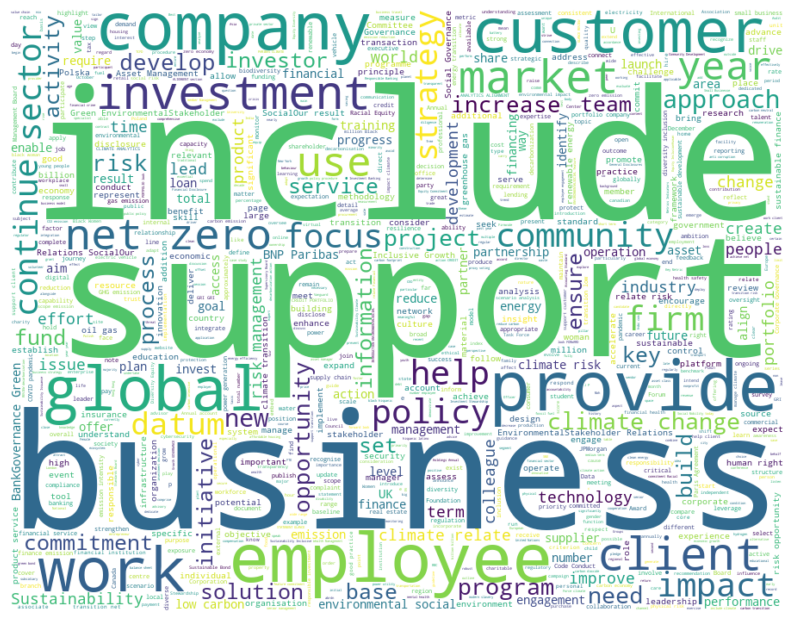

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


large_string = ' '.join(esg_lemmatized.lemma)

# use 3rd party lib to compute term freq., apply stop words
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=900, 
    height=700, 
    stopwords=stop_words, 
    contour_width=3, 
    contour_color='steelblue'
)

# display our wordcloud across all records
plt.figure(figsize=(10,10))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [33]:
# Run bi-gram TF-IDF frequencies
bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(2,2), min_df=10, use_idf=True)
bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(esg_lemmatized['lemma'])


In [34]:
bigram_tf_idf

<8619x915 sparse matrix of type '<class 'numpy.float64'>'
	with 20291 stored elements in Compressed Sparse Row format>

In [35]:
#display bigram_tf_idf 
# Convert bigram_tf_idf to dense matrix
dense_matrix = bigram_tf_idf.todense()

# Print dense matrix
print(dense_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

words = list(bigram_tf_idf_vectorizer.vocabulary_.keys())

# extract our top 10 ngrams
total_counts = np.zeros(len(words))
for t in bigram_tf_idf:
    total_counts += t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]     #sliced using [0:10] to select only the top 10 entries with the highest total counts.
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words)) 



In [37]:
words

['2020 2030',
 'impact operation',
 'credit risk',
 'zero banking',
 'banking alliance',
 'executive officer',
 'activity include',
 'zero economy',
 'sustainable financing',
 'service offer']

In [38]:
total_counts

array([  7.81735412,  16.24923375,   4.95491583,  22.87361954,
        12.34835814,   6.00363168,   9.18792668,   6.66461023,
         7.00944618,  14.56142403,  43.46319457,  32.48331436,
         2.49554665,   4.4824361 ,   7.02425478,   6.52218291,
         9.91410868,  12.80158637,   4.16695024,   6.96690964,
        15.1745754 ,   3.38665915,  15.48309899,  15.09702069,
        16.18260799,   4.4546047 ,  10.33821925,   6.67552413,
         7.12515671,  14.99924329,   6.3453436 ,  12.33556378,
         3.13238929,   6.28666107,  26.20832847,  13.14354638,
        10.13521638,   9.18826023,   4.72417472,   4.66031225,
         5.56791862,   4.59356528,   2.92640788,  13.4002194 ,
         7.75976722,   6.23205488,   6.39181404,   6.14604273,
        13.65466503,   8.55238412,   6.97505725,   6.21758195,
         4.20339804,  10.02813152,   5.56953422,   6.34186844,
        11.08243902,   5.15070116,   6.78099007,   7.33175662,
         6.3185848 ,   7.23956687,  16.36895322,   3.21

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

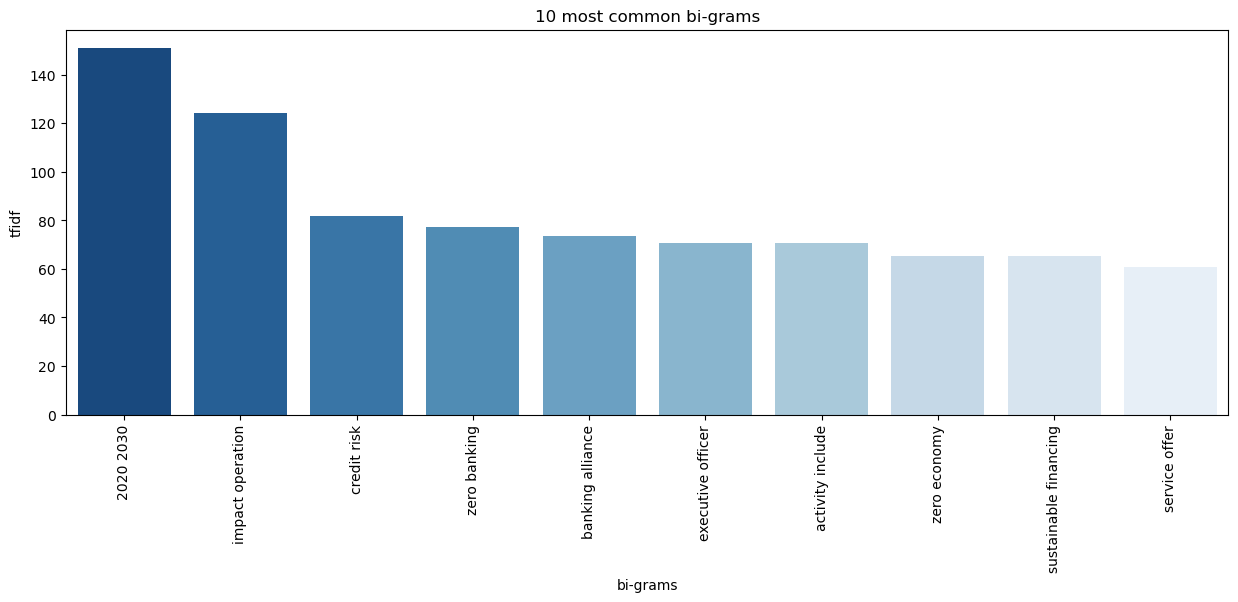

In [40]:
# Plot top 10 ngrams
plt.figure(figsize=(15, 5))
plt.subplot(title='10 most common bi-grams')
sns.barplot(x=words, y=counts, palette='Blues_r')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('bi-grams')
plt.ylabel('tfidf')
plt.show()

In [41]:
from sklearn.decomposition import LatentDirichletAllocation as LDA


In [42]:
mlflow.end_run()

In [43]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

from sklearn.feature_extraction.text import CountVectorizer

#Topic modelling
word_tf_vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1,1))                    #counting the number of occurrences of each word in each document.
word_tf = word_tf_vectorizer.fit_transform(esg_lemmatized.lemma)
# serialize stopwords 
json_data = json.dumps([a for a in stop_words], indent=2)
f = open("C:\\Users\\User\\ESG\\stopwords.json", "w")
f.write(json_data)
f.close()
  
# track experiment on MLflow
with mlflow.start_run(run_name='topic_modelling'):                                            #how many args could we pass ?
  
  # Train a LDA model with 9 topics
  lda = LDA(random_state = 42, n_components = 9, learning_decay = .3)
  lda.fit(word_tf) # trains the LDA model on the word frequency matrix word_tf.

2023/05/21 21:43:25 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [44]:
  # Log model 
  mlflow.sklearn.log_model(lda, "model")
  mlflow.log_param('n_components', '9')
  mlflow.log_param('learning_decay', '.3')
  mlflow.log_metric('perplexity', lda.perplexity(word_tf))
  mlflow.log_artifact("C:\\Users\\User\\ESG\\stopwords.json")
  

2023/05/21 21:44:02 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
C:\Users\User\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [45]:
  # retrieve run ID to attach topic name later
  lda_run_id = mlflow.active_run().info.run_id

In [46]:
# Retrieve top N words describing each of our 9 topics

def top_words(model, feature_names, n_top_words):
    topics_words = []
    for topic_idx, topic in enumerate(model.components_):
        
        words = []
        for i in topic.argsort()[:-n_top_words-1:-1]:
            if len(feature_names[i]) > 1:
                words.append(feature_names[i])
            else:
                words.append('')
            
        topics_words.append(words)
        df = pd.DataFrame(topics_words)
    return df



In [47]:
# Display topics keywords for inspection and for us to label topics
# Vectorize words using TF-IDF Vectorizer

tf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tf_vectorizer.fit(esg_lemmatized.lemma)
tf_feature_names = tf_vectorizer.get_feature_names_out()
display(top_words(lda, tf_feature_names, 15))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,energy,green,2021,project,sustainability,bond,social,sustainable,renewable,include,million,company,provide,finance,issuance
1,client,customer,need,solution,provide,market,use,product,service,continue,new,energy,work,support,experience
2,scenario,risk,increase,term,high,analysis,supply,2021,use,customer,water,chain,company,low,sector
3,asset,management,net,customer,banking,zero,2021,financial,global,page,annual,include,agreement,manage,code
4,community,employee,support,2021,people,business,help,inclusive,diversity,growth,program,woman,black,year,000
5,2021,emission,gas,scope,result,number,total,2020,green,oil,relations,finance,sector,socialour,environmentalstakeholder
6,climate,investment,transition,carbon,company,zero,net,change,portfolio,support,client,risk,global,relate,sustainable
7,risk,management,policy,governance,include,board,environmental,climate,business,corporate,social,information,committee,conduct,process
8,work,development,continue,support,colleague,sustainable,business,industry,financial,new,world,customer,employee,datum,develop


'\ntf_vectorizer = TfidfVectorizer(stop_words=stop_words)\ntf_feature_names = tf_vectorizer.get_feature_names()\ndisplay(top_words(lda, tf_feature_names, 15))\n'

In [48]:
#Define topic names
# We estimated our topics to be described around the following themes

topic_names = [
    'green energy',
    'focus customer',
  'value employees',
  'strong governance', 
  'support community',
  'company transformation',
  'ethical investments',
  'sustainable finance',
  'code of conduct',
]



In [49]:
# serialize topic names
json_data = json.dumps(topic_names, indent=2)
f = open("C:\\Users\\User\\ESG\\topics.json", "w")
f.write(json_data)
f.close()

In [50]:
# attach topics name to LDA model on mlflow
# we do not wish to re-open run_id and therefore alter start / end time
# instead, we log artifact to existing run
client = mlflow.tracking.MlflowClient()
client.log_artifact(lda_run_id, "C:\\Users\\User\\ESG\\topics.json")

In [51]:
from wordcloud import WordCloud

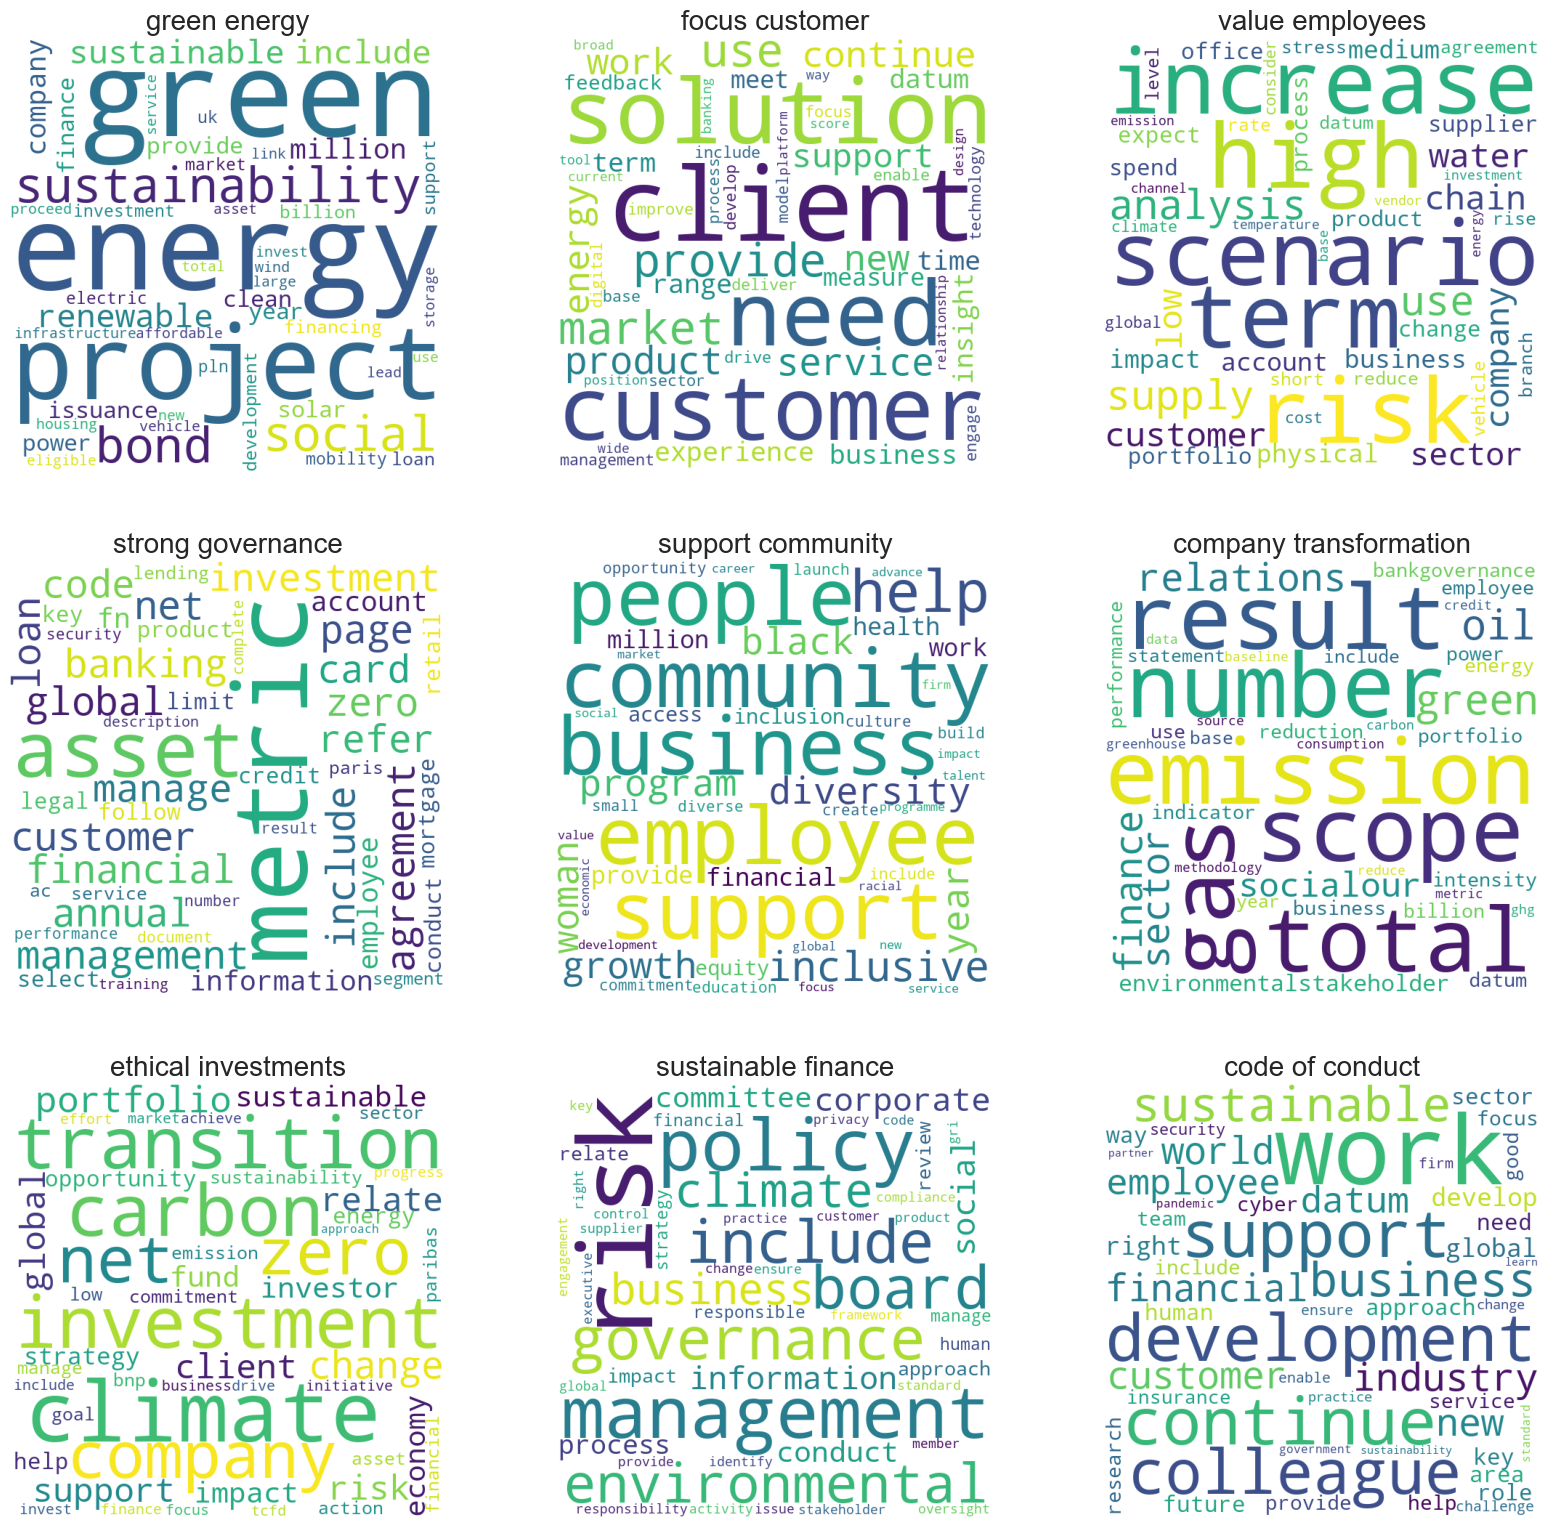

In [76]:
#Display topics
# We ensure relevance of our topics using simple wordcloud visualisation
from wordcloud import WordCloud

def word_cloud(model, tf_feature_names, index):
    
    imp_words_topic=""
    comp = model.components_[index]
    vocab_comp = zip(tf_feature_names, comp)
    sorted_words = sorted(vocab_comp, key = lambda x:x[1], reverse=True)[:50]
    
    for word in sorted_words:
        imp_words_topic = imp_words_topic + " " + word[0]
    
    return WordCloud(
        background_color="white",
        width=600, 
        height=600, 
        contour_width=3, 
        contour_color='steelblue'
    ).generate(imp_words_topic)
    
topics = len(lda.components_)
fig = plt.figure(figsize=(20, 20 * topics / 3))

# Display wordcloud for each extracted topic
for i, topic in enumerate(lda.components_):
    ax = fig.add_subplot(topics,3, i + 1)
    ax.set_title(topic_names[i], fontsize=20)
    wordcloud = word_cloud(lda, tf_feature_names, i)
    ax.imshow(wordcloud)
    ax.axis('off')
    

In [53]:
#Attach topic distribution to each ESG statement
# score our original dataset to attach topic distribution to each ESG statement
transformed = lda.transform(word_tf)

# find principal topic from distribution...
a = [topic_names[np.argmax(distribution)] for distribution in transformed]

# ... with associated probability
b = [np.max(distribution) for distribution in transformed]

# consolidate LDA output into a handy dataframe 
df1 = esg_lemmatized[['company', 'statements', 'lemma']]
df2 = pd.DataFrame(zip(a,b,transformed), columns=['topic', 'probability', 'probabilities'])
esg_group = pd.concat([df1, df2], axis=1)

# display dataframe
display(esg_group[['company', 'lemma', 'topic', 'probability']])

,company,lemma,topic,probability
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,company transformation,0.431434
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,support community,0.355995
2,jp morgan chase,"company like serve customer , client community...",support community,0.626462
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...",focus customer,0.430937
4,jp morgan chase,leverage expertise company support green futur...,support community,0.792273
...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",strong governance,0.763306
8615,ruffer,"llp information provider , include limitation ...",strong governance,0.473985
8616,ruffer,"Parties express imply warranty kind , Parties ...",code of conduct,0.947690
8617,ruffer,Parties shall liability error omission connect...,strong governance,0.888822


In [54]:
#Attach topic distribution to each ESG statement
# score our original dataset to attach topic distribution to each ESG statement
transformed = lda.transform(word_tf)

# find principal topic from distribution...
a = [topic_names[np.argmax(distribution)] for distribution in transformed]

# ... with associated probability
b = [np.max(distribution) for distribution in transformed]

# consolidate LDA output into a handy dataframe 
df1 = esg_lemmatized[['company', 'lemma', 'statements']]
df2 = pd.DataFrame(zip(a,b,transformed), columns=['topic', 'probability', 'probabilities'])
esg_group = pd.concat([df1, df2], axis=1)

# display dataframe
display(esg_group[['company', 'lemma', 'topic', 'probability']])

,company,lemma,topic,probability
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,company transformation,0.431434
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,support community,0.355995
2,jp morgan chase,"company like serve customer , client community...",support community,0.626462
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...",focus customer,0.430937
4,jp morgan chase,leverage expertise company support green futur...,support community,0.792273
...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",strong governance,0.763306
8615,ruffer,"llp information provider , include limitation ...",strong governance,0.473985
8616,ruffer,"Parties express imply warranty kind , Parties ...",code of conduct,0.947690
8617,ruffer,Parties shall liability error omission connect...,strong governance,0.888822


In [55]:
from sklearn.preprocessing import MinMaxScaler


In [56]:
#Compare companies core ESG initiatives
# create a simple pivot table of number of occurence of each topic across organisations

esg_focus = pd.crosstab(esg_group.company, esg_group.topic)

# scale topic frequency between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))

# normalize pivot table
esg_focus_norm = pd.DataFrame(scaler.fit_transform(esg_focus), columns=esg_focus.columns)
esg_focus_norm.index = esg_focus.index

In [57]:
esg_focus_norm

topic,code of conduct,company transformation,ethical investments,focus customer,green energy,strong governance,support community,sustainable finance,value employees
company,,,,,,,,,
BNP Paribas,0.176829,0.582222,0.720930,0.279570,0.212121,0.000000,0.000000,0.000000,0.141509
aberdeen standard,0.731707,0.195556,0.223256,0.225806,0.287879,0.108696,0.325275,0.288136,0.094340
goldman sachs,0.536585,0.173333,1.000000,1.000000,1.000000,0.304348,0.679121,0.166102,0.254717
hsbc,1.000000,0.640000,0.479070,0.731183,0.318182,0.347826,0.305495,0.793220,1.000000
jp morgan chase,0.591463,0.253333,0.227907,0.559140,0.719697,0.619565,1.000000,0.555932,0.226415
lloyds,0.402439,0.000000,0.144186,0.225806,0.181818,0.065217,0.358242,0.067797,0.000000
macquarie,0.219512,0.053333,0.051163,0.419355,0.303030,0.065217,0.081319,0.203390,0.103774
rbc,0.560976,0.386667,0.348837,0.892473,0.295455,1.000000,0.595604,0.338983,0.150943
riverstone,0.121951,0.111111,0.172093,0.064516,0.212121,0.000000,0.010989,0.030508,0.047170


In [58]:
esg_focus

topic,code of conduct,company transformation,ethical investments,focus customer,green energy,strong governance,support community,sustainable finance,value employees
company,,,,,,,,,
BNP Paribas,32,141,224,34,36,8,6,17,28
aberdeen standard,123,54,117,29,46,18,154,102,23
goldman sachs,91,49,284,101,140,36,315,66,40
hsbc,167,154,172,76,50,40,145,251,119
jp morgan chase,100,67,118,60,103,65,461,181,37
lloyds,69,10,100,29,32,14,169,37,13
macquarie,39,22,80,47,48,14,43,77,24
rbc,95,97,144,91,47,100,277,117,29
riverstone,23,35,106,14,36,8,11,26,18


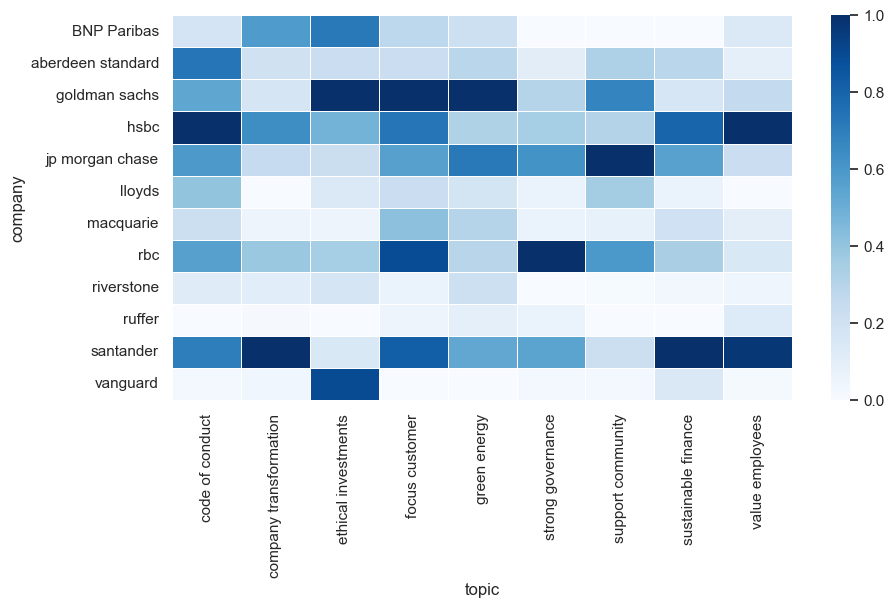

In [59]:
# plot heatmap, showing main area of focus for each FSI across topics we learned
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(esg_focus_norm, annot=False, linewidths=.5, cmap='Blues')
plt.show()

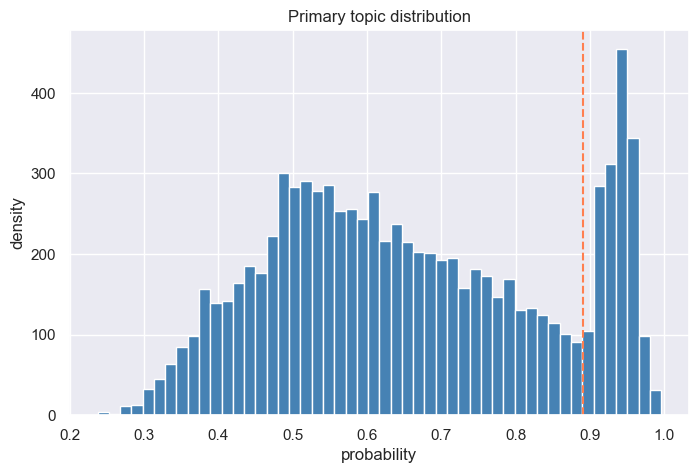

In [60]:
#Show distribution of topic probability

# not every statement follows a well defined topic

# some statements may be more generic and span across multiple themes

esg_group.probability.hist(bins=50, figsize=(8,5), color='steelblue')

# plot distribution of main topic proability
plt.axvline(0.89, color='coral', linestyle='--')
plt.title('Primary topic distribution')
plt.xlabel('probability')
plt.ylabel('density')
plt.show()

In [61]:
esg_group.probability

0       0.431434
1       0.355995
2       0.626462
3       0.430937
4       0.792273
          ...   
8614    0.763306
8615    0.473985
8616    0.947690
8617    0.888822
8618    0.351913
Name: probability, Length: 8619, dtype: float64

In [62]:
#Retrieve key statements for each topic

# extract statements relevant to a given topic

topic_discussions = esg_group[esg_group['topic'] == 'green energy']

# as specified in probability distribution, we want only specific topics and not general discussions
topic_discussions = topic_discussions[topic_discussions['probability'] > 0.89]

# access more specific topics first

topic_discussions = topic_discussions.sort_values('probability', ascending=False)

rows = [] 
for i, row in topic_discussions.iterrows():
  rows.append([row.company, row.probability, row.statements])

# display dataframe of statements for selected topic of interest
display(pd.DataFrame(rows, columns=['company', 'probability', 'statement']))

,company,probability,statement
0,hsbc,0.990641,Withholding taxes $366m (2020: $386m)Employer ...
1,goldman sachs,0.980236,Sustainability Report 2021 Sustainability Issu...
2,santander,0.980233,Katarzyna Teter Sustainability & ESG Team Mana...
3,goldman sachs,0.979314,Hinchliffe StadiumCASE STUDY: 475 Bay Street 1...
4,santander,0.978314,Music videos of songs recorded in 2021: Szymon...
...,...,...,...
96,jp morgan chase,0.908027,Our Target in Action: Powering Americas Larges...
97,jp morgan chase,0.903446,We will allocate an amount equal to the net pr...
98,goldman sachs,0.901224,A ssurance that the allocation of funds from e...
99,rbc,0.901209,The amount of financing we provide annually fo...


In [63]:
#STEP3: Key ESG initiatives
#identifier les declarations spécific à chaque entreprise à partir des proba de LDA en utilisant KMeans : clustering chaque declaration en fct de leur similitude

In [64]:
from sklearn.cluster import KMeans


In [65]:
#1 déterminier le nombre optimale des clusters K avec ELBOW METHOD
# we extract our probabilities distribution as input vectors for KMeans
X_train = list(esg_group.probabilities)

# nevertheless, we still want to ensure relavance of our clustering using the simple "elbow method"
# we capture the sum of squared distance of each point to their closest center for different values of k
wsses = []
for k in [5, 8, 10, 20, 30, 50, 80, 100]:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train)
  wsse = np.sum([np.min(x)**2 for x in kmeans.transform(X_train)]) 
  wsses.append([k, wsse])
  
#we simply plot the WSSE against K to find optimal K value
wsse_df = pd.DataFrame(wsses, columns=['k', 'wsse'])
display(wsse_df)



C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

,k,wsse
0,5,1688.349632
1,8,1016.130923
2,10,812.552961
3,20,571.278515
4,30,437.095825
5,50,290.837042
6,80,206.054502
7,100,177.207809


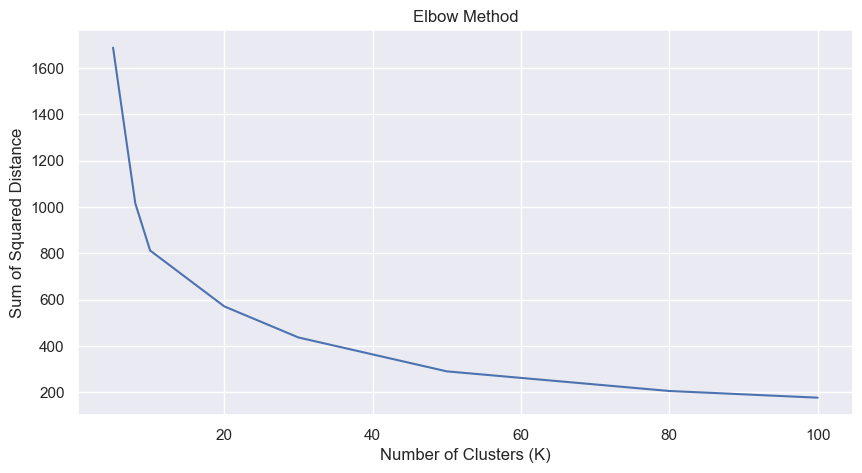

In [66]:
import matplotlib.pyplot as plt

# plot the WSSE against K to find optimal K value
plt.plot(wsse_df['k'], wsse_df['wsse'])
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distance')
plt.show()


In [67]:
# K is aroud 15 - 20 cluster

In [68]:
mlflow.end_run()

In [165]:
#grouper les déclarations en clusters et déterminer la plus proche distance
# track experiment on MLflow
with mlflow.start_run(run_name='clustering'):
  
  # we train our KMeans model trained with the appropriate value for K
  kmeans = KMeans(n_clusters=20, random_state=42)
  kmeans.fit(X_train)
  
  # Log model 
  mlflow.sklearn.log_model(kmeans, "model")
  mlflow.log_param('n_clusters', '15')
  mlflow.log_metric('wsse', np.sum([np.min(x)**2 for x in kmeans.transform(X_train)]))
  
  # Retrieve experiment ID
  cluster_run_id = mlflow.active_run().info.run_id

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [178]:
# Assign statements to closest clusters
# find the minimum distance for each point to their closest cluster
y_dist = [np.min(x) for x in kmeans.transform(X_train)]                          #calcule la distance minimale entre chaque point
dist_df = pd.DataFrame(zip(y_dist), columns=['distance'])
esg_group_dist = pd.concat([esg_group, dist_df], axis=1)

In [179]:
esg_group_dist[['company', 'lemma', 'topic','probability','distance']]

,company,lemma,topic,probability,distance
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,company transformation,0.431434,0.244888
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,support community,0.355995,0.356593
2,jp morgan chase,"company like serve customer , client community...",support community,0.626462,0.273967
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...",focus customer,0.430937,0.379503
4,jp morgan chase,leverage expertise company support green futur...,support community,0.792273,0.138808
...,...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",strong governance,0.763306,0.195579
8615,ruffer,"llp information provider , include limitation ...",strong governance,0.473985,0.336718
8616,ruffer,"Parties express imply warranty kind , Parties ...",code of conduct,0.947690,0.233172
8617,ruffer,Parties shall liability error omission connect...,strong governance,0.888822,0.259916


In [180]:
esg_group_dist

,company,lemma,statements,topic,probability,probabilities,distance
0,jp morgan chase,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE Environ...,2021 ENVIRONMENTAL SOCIAL & GOVERNANCE REPORT ...,company transformation,0.431434,"[0.24275492686512953, 0.0022225656835025386, 0...",0.244888
1,jp morgan chase,feature : commitment Racial Equity 21Diversity...,Feature: Our Commitment to Racial Equity 21Div...,support community,0.355995,"[0.0019850496042383313, 0.0019855659086369503,...",0.356593
2,jp morgan chase,"company like serve customer , client community...",It has also shown what companies like ours can...,support community,0.626462,"[0.005556563444668109, 0.00556130674464618, 0....",0.273967
3,jp morgan chase,"period uncertainty , JPMorgan lead tireless fo...","Throughout this period of uncertainty, JPMorga...",focus customer,0.430937,"[0.316457158550721, 0.43093679446483224, 0.010...",0.379503
4,jp morgan chase,leverage expertise company support green futur...,We are leveraging capital and expertise across...,support community,0.792273,"[0.13699069034074643, 0.010106428405207337, 0....",0.138808
...,...,...,...,...,...,...,...
8614,ruffer,"financial promotion issue LLP , authorise regu...",This financial promotion is issued by Ruffer L...,strong governance,0.763306,"[0.011114398437383915, 0.011112977973320561, 0...",0.195579
8615,ruffer,"llp information provider , include limitation ...","Although Ruffer LLPs information providers, in...",strong governance,0.473985,"[0.00483268711517199, 0.30014699364956837, 0.0...",0.336718
8616,ruffer,"Parties express imply warranty kind , Parties ...",None of the ESG Parties makes any express or i...,code of conduct,0.947690,"[0.006537251532908539, 0.006540749827973191, 0...",0.233172
8617,ruffer,Parties shall liability error omission connect...,None of the ESG Parties shall have any liabili...,strong governance,0.888822,"[0.013889053964650566, 0.013901809821684841, 0...",0.259916


In [72]:

#esg_group_dist.to_csv('esg_reports.csv', index=False)


In [90]:
!pip install delta-spark


  Using cached pyspark-3.3.2-py2.py3-none-any.whl
  Using cached py4j-0.10.9.5-py2.py3-none-any.whl (199 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.4.0
    Uninstalling pyspark-3.4.0:
      Successfully uninstalled pyspark-3.4.0


In [89]:
!pip install pyspark


In [91]:
import pandas as pd
from pyspark.sql import SparkSession

from sqlalchemy import create_engine, text

spark = SparkSession.builder.appName("NLP_ESG").getOrCreate()

df = pd.DataFrame(esg_group_dist)
# create a SQLite engine
engine = create_engine('sqlite:///esg.db', echo=False)

df.to_sql('reports', con=engine, if_exists='replace')

In [94]:
engine 

Engine(sqlite:///esg.db)

In [187]:
from sqlalchemy import create_engine, text

query = """
    SELECT 
        t.company,
        t.topic,
        t.statement
       
    FROM (
        SELECT 
            e.company,
            e.topic,
            e.probability,
            e.distance,
            LOWER(e.statements) AS statement,
            dense_rank() OVER (PARTITION BY e.company, e.topic ORDER BY e.distance DESC) as rank
        FROM reports e
    ) t
    WHERE t.rank = 1
    AND t.topic IN ('green energy')
    ORDER BY company, topic, rank
"""

df = pd.read_sql_query(sql=query, con=engine.connect())


In [188]:
df

,company,topic,statement
0,BNP Paribas,green energy,worlds best bank for sustainable finance 2021 ...
1,aberdeen standard,green energy,social diverse talent case study our leaders a...
2,goldman sachs,green energy,goldman sachs provided financing for the groun...
3,hsbc,green energy,"as mandated lead arranger, facility and securi..."
4,jp morgan chase,green energy,"in 2021 alone, our e-waste program diverted mo..."
5,lloyds,green energy,"certain functions are reserved to the council,..."
6,macquarie,green energy,supporting a major australian real estate trus...
7,rbc,green energy,the pcaf methodology for business loans and un...
8,riverstone,green energy,the companys boost charger plugs into existing...
9,ruffer,green energy,this involves partnerships with orsted (hydrog...


In [158]:
query = """
WITH ranked AS (
  SELECT 
    e.topic, 
    e.statements, 
    e.company,
    dense_rank() OVER (PARTITION BY e.company, e.topic ORDER BY e.probability DESC) as rank
  FROM reports e
)

SELECT 
  t.topic,
  t.statements
FROM ranked t
WHERE t.company = 'goldman sachs' 
AND t.rank = 1
"""
df = pd.read_sql_query(sql= text(query), con=engine.connect())

In [100]:
df

,topic,statements
0,code of conduct,"Through its technology platform, Phononics inn..."
1,company transformation,"Autocallable Certificates due 2026, (iii) the ..."
2,ethical investments,Sustainability Report 2021 Introduction INTROD...
3,focus customer,"Olist seeks to address the fragmentation, oper..."
4,green energy,Sustainability Report 2021 Sustainability Issu...
5,strong governance,Please see pages 14-18 and 82-84 of our 2021 F...
6,support community,Over $1.6B lending capital deployed45% of loan...
7,sustainable finance,"With respect to risk management, for example, ..."
8,value employees,Employee Incentives and Risk TakingPercentage ...


In [219]:
import pandas as pd


# Sélectionner les colonnes pertinentes
relevant_columns = ["topic", "company", "probability"]
esg_scores = esg_group_dist[relevant_columns]

# Grouper les données par "topic" et "company" et calculer la somme des probabilités pour chaque groupe
esg_scores = esg_scores.groupby(["topic", "company"]).agg(esg=("probability", "sum")).reset_index()

# Ajouter une colonne "rank" représentant le classement des organisations en fonction de "esg", en les ordonnant par ordre croissant
esg_scores["rank"] = esg_scores["esg"].rank(ascending=True)

# Calculer le score ESG en divisant le classement par le nombre total d'organisations et en le multipliant par 100
esg_scores["esg"] = (esg_scores["rank"] / len(esg_scores)) * 100

# Arrondir le résultat du calcul précédent à un entier
esg_scores["esg"] = esg_scores["esg"].round().astype(int)

# Sélectionner les colonnes "company", "topic" et "esg" pour les résultats finaux
esg_score = esg_scores[["company", "topic", "esg"]]




In [220]:
esg_score

,company,topic,esg
0,BNP Paribas,code of conduct,35
1,aberdeen standard,code of conduct,80
2,goldman sachs,code of conduct,65
3,hsbc,code of conduct,88
4,jp morgan chase,code of conduct,72
...,...,...,...
103,rbc,value employees,30
104,riverstone,value employees,22
105,ruffer,value employees,31
106,santander,value employees,81


In [221]:
esg_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  108 non-null    object
 1   topic    108 non-null    object
 2   esg      108 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 2.2+ KB


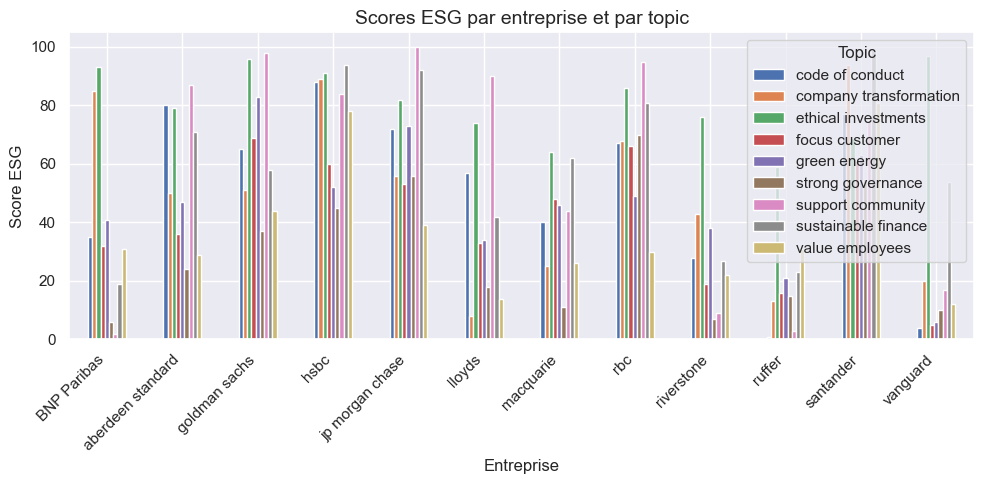

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Transposer les données pour avoir les entreprises en index et les topics en colonnes
esg_score_pivot = esg_score.pivot(index='company', columns='topic', values='esg')
# Tracer un graphique en barres pour chaque entreprise et chaque topic
esg_score_pivot.plot(kind='bar')

# Ajouter des décorations à la charte
plt.xlabel('Entreprise', fontsize=12)
plt.ylabel('Score ESG', fontsize=12)
plt.title('Scores ESG par entreprise et par topic', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Topic')

# Afficher la charte
plt.tight_layout()
plt.show()



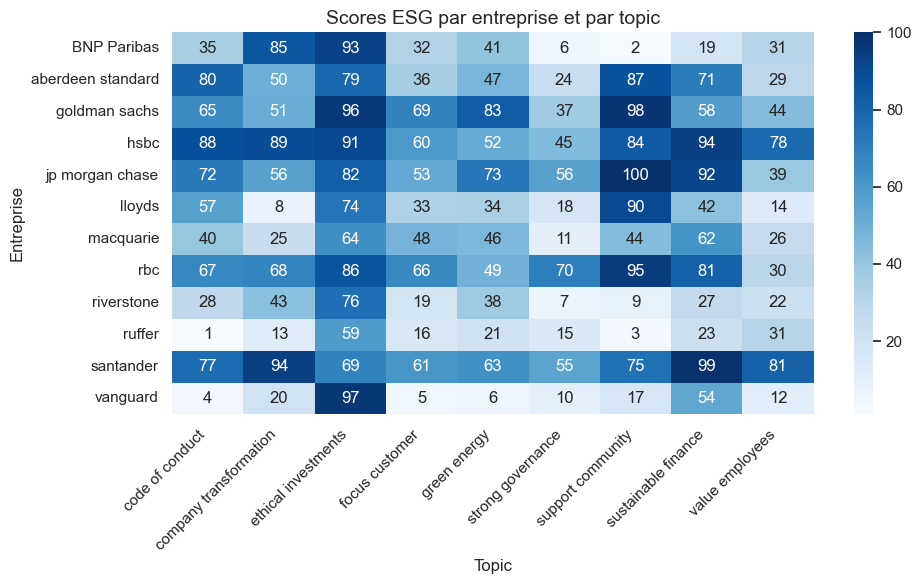

In [223]:
import seaborn as sns

# Transposer les données pour avoir les entreprises en index et les topics en colonnes
esg_score_pivot = esg_score.pivot(index='company', columns='topic', values='esg')

# Tracer une heatmap pour visualiser les scores ESG par entreprise et par topic
plt.figure(figsize=(10, 6))
sns.heatmap(esg_score_pivot, cmap='Blues', annot=True, fmt="d")

# Ajouter des décorations à la charte
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Entreprise', fontsize=12)
plt.title('Scores ESG par entreprise et par topic', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Afficher la charte
plt.tight_layout()
plt.show()


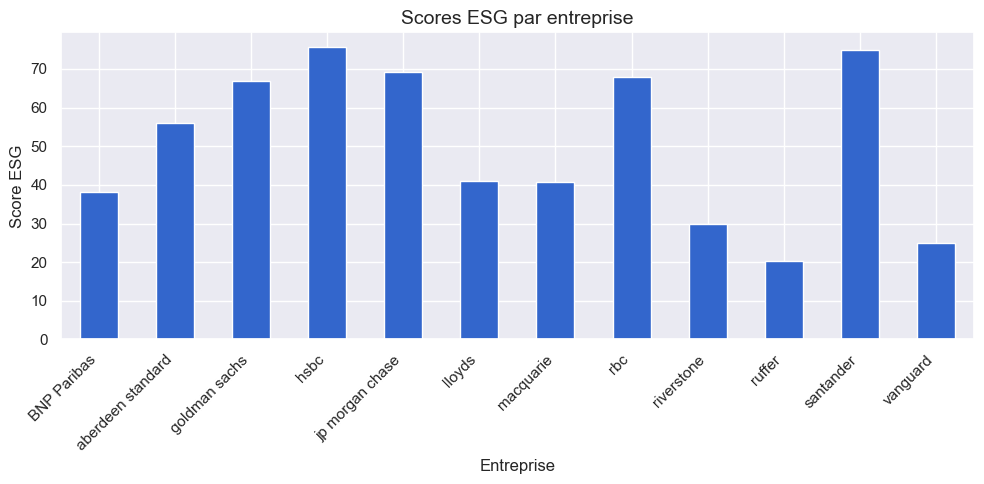

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer une copie du DataFrame esg_scores
esg_scores_copy = esg_scores.copy()

# Grouper les "topic" par "company" et calculer la moyenne de la colonne 'esg' pour chaque groupe
esg_scores_copy = esg_scores_copy.groupby("company").agg(esg=("esg", "mean")).reset_index()

# Ajouter une colonne 'sum' contenant la somme des scores agrégés
esg_scores_copy['sum'] = esg_scores_copy['esg'].sum()

# Définir l'index du DataFrame sur la colonne 'company'
esg_scores_copy = esg_scores_copy.set_index('company')

# Trier les données selon la colonne 'sum' par ordre décroissant
esg_scores_copy = esg_scores_copy.sort_values('sum', ascending=False)

# Supprimer la colonne 'sum' du DataFrame
esg_scores_copy = esg_scores_copy.drop('sum', axis=1)

# Tracer un graphique en barres des scores ESG par entreprise
colors = ["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099"]
esg_scores_copy.plot(kind='bar', legend=False, color=colors)

plt.xlabel('Entreprise', fontsize=12)
plt.ylabel('Score ESG', fontsize=12)
plt.title('Scores ESG par entreprise', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Afficher la charte
plt.tight_layout()
plt.show()


In [209]:
esg_scores.reset_index(inplace=True)


In [210]:
esg_scores

,company,esg
0,BNP Paribas,38.222222
1,aberdeen standard,55.888889
2,goldman sachs,66.777778
3,hsbc,75.666667
4,jp morgan chase,69.222222
5,lloyds,41.111111
6,macquarie,40.666667
7,rbc,68.000000
8,riverstone,29.888889
9,ruffer,20.222222
